In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import math

In [2]:
df = yf.download('AAPL','2012-01-03','2020-03-13')
data = df.filter(['Close'])
data

[*********************100%***********************]  1 of 1 completed


,Close
Date,
2012-01-03,58.747143
2012-01-04,59.062859
2012-01-05,59.718571
2012-01-06,60.342857
2012-01-09,60.247143
...,...
2020-03-06,289.029999
2020-03-09,266.170013
2020-03-10,285.339996


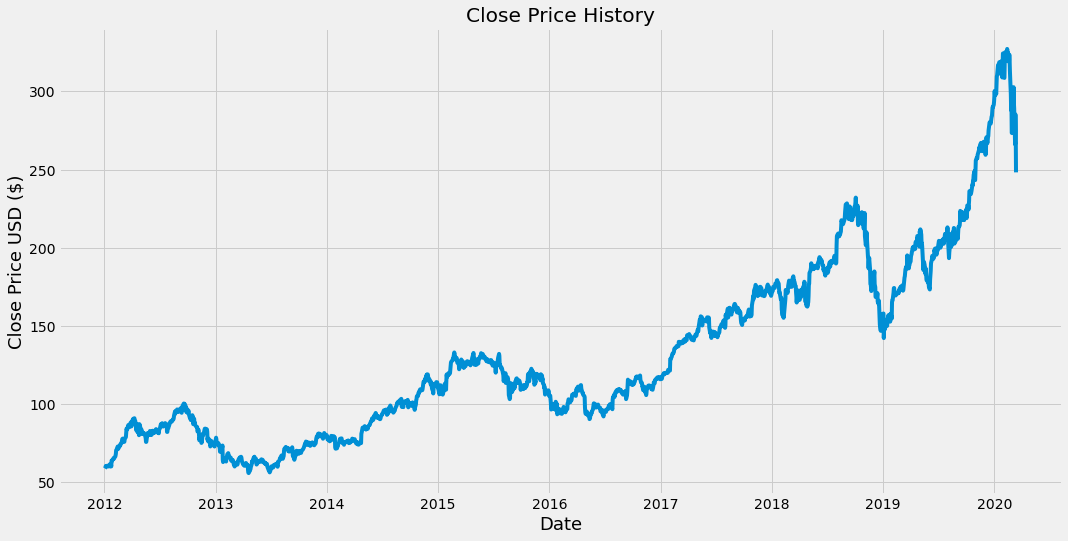

In [3]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.show()

In [4]:
scaler = MinMaxScaler(feature_range=(0, 1)) 
scaled_data = scaler.fit_transform(data)
scaled_data

array([[0.01089548],
       [0.01205872],
       [0.01447467],
       ...,
       [0.84576834],
       [0.80925531],
       [0.70903794]])

In [5]:
# import numpy as np
# import pandas as pd
# a = 0
# b = 60
# Y = True
# x_train = [[0 for j in range(61)] for i in range(len(scaled_data)-60)]
# y_train = [0 for j in range(len(scaled_data)-60)]
# i = 0
# while Y is True:
#     sample_data = scaled_data[a:b]
#     x_train[i] = sample_data[:58]
#     y_train[i] = sample_data[59]
#     a += 1
#     b += 1
#     i += 1
#     if b > len(scaled_data) - 1:
#         Y = False
# x_train, y_train = np.array(x_train), np.array(y_train)

training_data_len = math.ceil(len(scaled_data) * 0.8)
train_data = scaled_data[:training_data_len, : ]
seed_len = 60

x_train = []
y_train = []

for i in range(seed_len, len(train_data)):
    x_train.append(train_data[i-seed_len:i, 0])
    y_train.append(train_data[i, 0])
    

x_train = np.array(x_train)
y_train = np.array(y_train)

In [6]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = np.reshape(y_train, (y_train.shape[0], 1))
x_train.shape

(1589, 60, 1)

In [7]:
y_train.shape

(1589, 1)